In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prep
from neuralprophet import NeuralProphet, set_log_level

In [3]:
df = pd.read_csv('monthly_sales.csv')

In [3]:
df.dtypes

year            object
commercial     float64
private        float64
total_sales    float64
dtype: object

In [4]:
df.year = pd.to_datetime(df.year)

In [5]:
df = df.rename(columns={'total_sales':'y', 'year': 'ds'})

In [6]:
df = df.drop(columns=['commercial', 'private'])

In [8]:
df.head()

,ds,y
0,1967-01-01,8393.0
1,1967-02-01,7467.0
2,1967-03-01,7887.0
3,1967-04-01,8836.0
4,1967-05-01,8669.0


In [7]:
train_size = .80
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [10]:
train.shape, test.shape

((534, 2), (133, 2))

In [11]:
m2 = NeuralProphet(
    n_lags=12,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
   
)
metrics = m2.fit(train)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.386% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 242


  0%|          | 0/119 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.10E-02, min: 1.24E+00


  0%|          | 0/119 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.10E-02, min: 3.04E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.58E-02
Epoch[242/242]: 100%|██████████| 242/242 [00:04<00:00, 50.68it/s, SmoothL1Loss=0.0037, MAE=406, RMSE=559, RegLoss=0]      


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.454% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2098: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.467% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/anaconda3/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



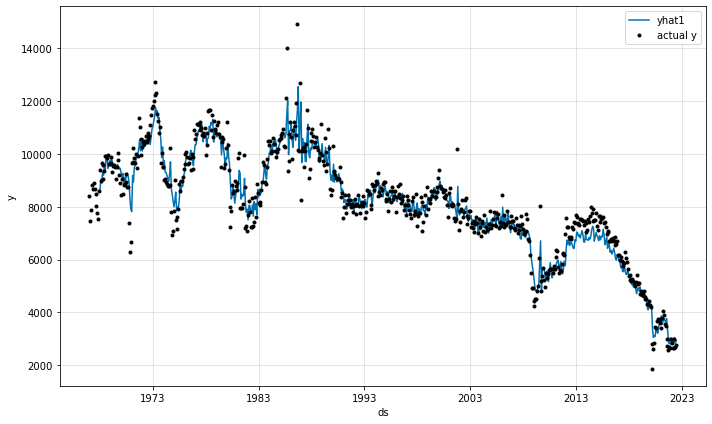

In [12]:
forecast = m2.predict(df)
fig = m2.plot(forecast)

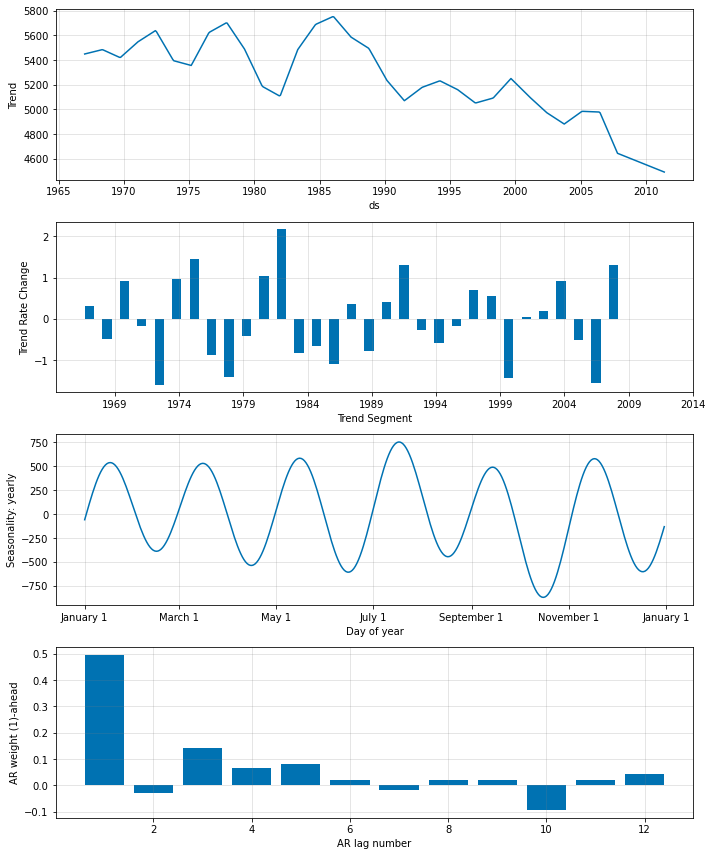

In [13]:
m2 = m2.highlight_nth_step_ahead_of_each_forecast(1) # temporary workaround to plot actual AR weights
fig_param = m2.plot_parameters()

In [14]:
m3 = NeuralProphet(seasonality_mode= "multiplicative", learning_rate = 0.1)



metrics_train = m3.fit(df=train, freq='MS')
metrics_test = m3.test(df=test)

metrics_test

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.386% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 240
Epoch[240/240]: 100%|██████████| 240/240 [00:04<00:00, 52.15it/s, SmoothL1Loss=0.00728, MAE=600, RMSE=801, RegLoss=0]     
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to majo

,SmoothL1Loss,MAE,RMSE
0,0.046199,1886.750977,2104.092529


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.454% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 222
ERROR - (NP.time_net.__init__) - Seasonality Mode auto not implemented. Defaulting to 'additive'.
Epoch[222/222]: 100%|██████████| 222/222 [00:05<00:00, 41.34it/s, SmoothL1Loss=0.00559, MAE=745, RMSE=952, RegLoss=0]        
INFO - (NP.df_utils._infer_frequency) - Major frequency MS correspond

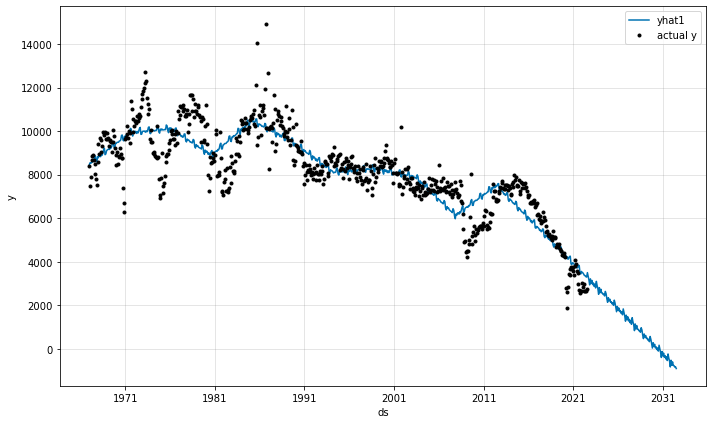

In [8]:
m4 = NeuralProphet(seasonality_mode= "auto", learning_rate = 0.1)
metrics_train2 = m4.fit(df, freq="M")
future = m4.make_future_dataframe(df, periods=120, n_historic_predictions=True)
forecast = m4.predict(future)
fig = m4.plot(forecast)